In [0]:
#@title Histrogram
# Histrogram 
# Please make sure to execute each cell in a sequence as each cell is dependent on its previous cell

In [0]:
# Sources are mentioned at the end of this notebook. This jupyter was run on google colab which provides better performance when processing on Image data

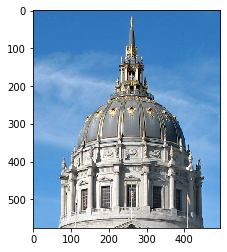

In [0]:
## 1 a. Lets import required library and display the image

import cv2
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

image = cv2.imread("city_hall_zoom.png")
image  = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

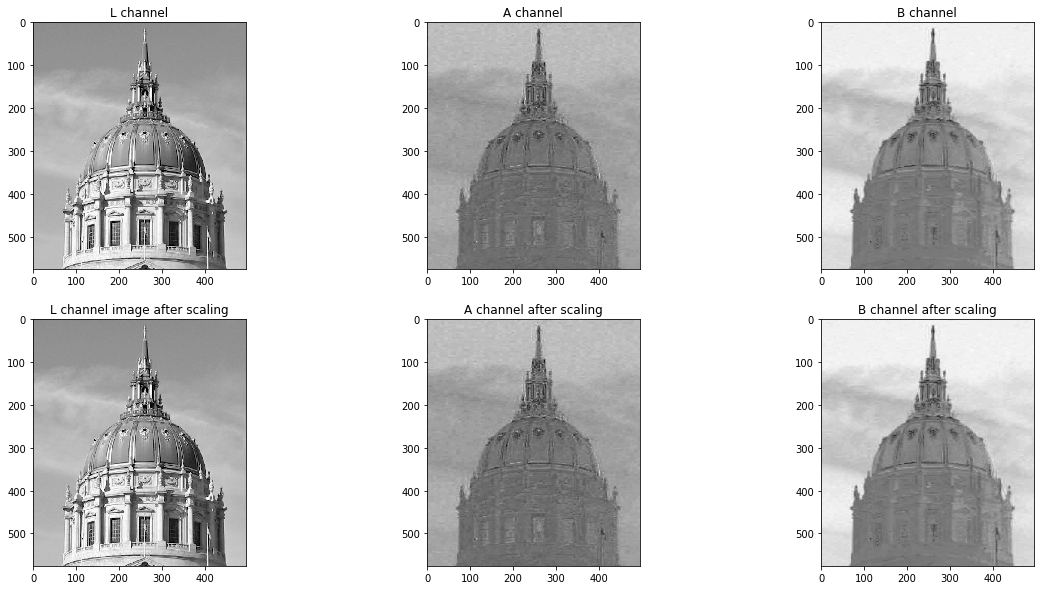

In [0]:
## 1 b.  Converting RGB image to LAB colour system and displaying each component as an image

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_image)
l_scaled = np.uint8(255.*(l - l.min())/(l.max() - l.min()))
a_scaled = np.uint8(255.*(a - a.min())/(a.max() - a.min()))
b_scaled  = np.uint8(255.*(b - b.min())/(b.max() - b.min()))


# Visualize the individual color channels
f, ax = plt.subplots(2, 3, figsize=(20,10))
ax[0,0].set_title('L channel')
ax[0,0].imshow(l_scaled, cmap='gray')
ax[0,1].set_title('A channel')
ax[0,1].imshow(a_scaled, cmap='gray')
ax[0,2].set_title('B channel')
ax[0,2].imshow(b_scaled, cmap='gray')

ax[1,0].set_title('L channel image after scaling')
ax[1,0].imshow(l, cmap='gray')
ax[1,1].set_title('A channel after scaling')
ax[1,1].imshow(a, cmap='gray')
ax[1,2].set_title('B channel after scaling')
ax[1,2].imshow(b, cmap='gray')

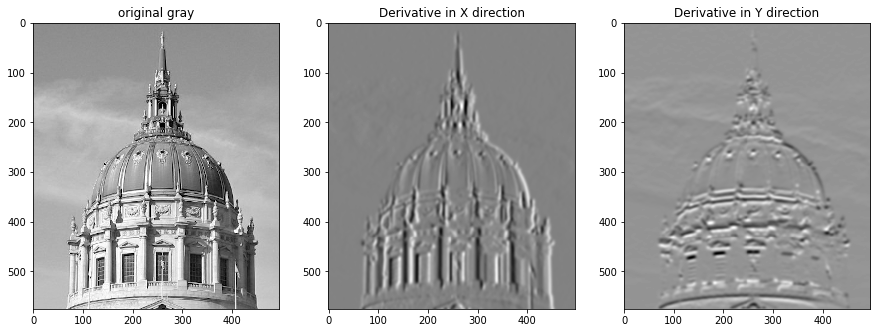

In [0]:
# # 1 C. Spatial derivative of luminance(l) is calculated in horizontal and vertical directon using derivative of gaussian filters.

##We shall be using scipy to calculate spatial derivative of luminance component in each direction by derivative of gaussian filters

from PIL import Image
from numpy import *
from scipy.ndimage import filters

# Along horizontal direction
lx = zeros(l.shape)
imx = filters.gaussian_filter(l, (3,3), (0,1), lx)

# Along vertical direction
ly = zeros(l.shape)
imy = filters.gaussian_filter(l, (3,3), (1,0), ly)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))

ax1.set_title('original gray')
ax1.imshow(l, cmap='gray')

ax2.set_title('Derivative in X direction')
ax2.imshow(imx, cmap='gray')

ax3.set_title('Derivative in Y direction')
ax3.imshow(imy, cmap='gray')

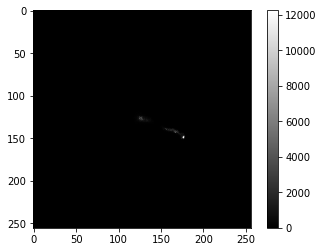

In [0]:
## 1 D. plotting 2D histrogram using (a,b) component in gray scale images

hist2d = cv2.calcHist([lab_image],[1,2], None, [256,256], [0,256,0,256])


plt.imshow(hist2d, cmap='gray')
plt.colorbar()


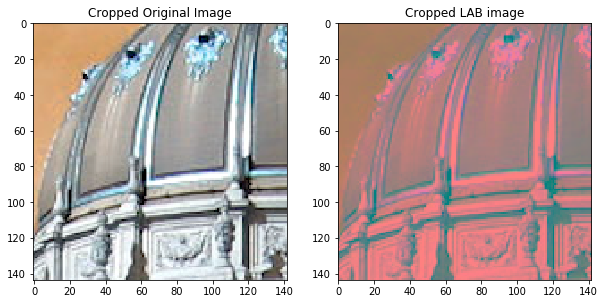

In [0]:
#1 E. To backproject the image, we need to pick a part of image and plot it accordingly

#Cropping the image and calculate its backprojection using (a,b)

cropped_image = cv2.imread("city_hall_zoom_cropped.png")

cropped_lab = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2LAB)

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.set_title("Cropped Original Image")
ax1.imshow(cropped_image, cmap ='gray')

ax2.set_title("Cropped LAB image")
ax2.imshow(cropped_lab, cmap ='gray')


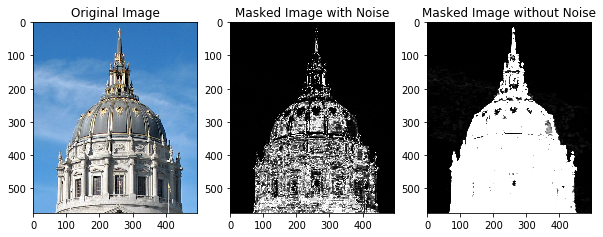

In [0]:
# 1E. Lets calculate 2d histogram for cropped image and try to back project it on our original image
# Lets apply back projection on original image and plot it

hist2d_cropped = cv2.calcHist([cropped_lab],[1,2], None, [256,256],[0,256, 0,256])

mask = cv2.calcBackProject([lab_image], [1,2], hist2d_cropped,[0,256, 0,256],1)



# Apply filter to improve the image after backprojection

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
filter_image = cv2.filter2D(mask, -1, kernel)

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))
ax1.set_title("Original Image")
ax1.imshow(image)

ax2.set_title("Masked Image with Noise")
ax2.imshow(mask, cmap ='gray')

ax3.set_title("Masked Image without Noise")
ax3.imshow(filter_image, cmap ='gray')



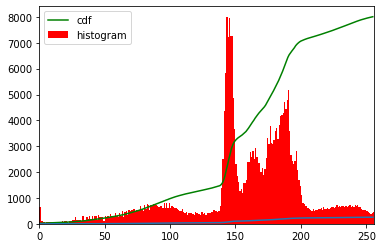

In [0]:
 ## This block will cover histogrm and cdf plot. Please move to the next section
  
hist,bins = np.histogram(l.flatten(),256,[0,256])
  
#plt.show(hist)
  
cdf = hist.cumsum()
cdf_normalized = hist.max() * cdf/ cdf.max()
  
plt.plot(cdf_normalized, color = 'g')
plt.hist(l.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

  
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

plt.plot(cdf)


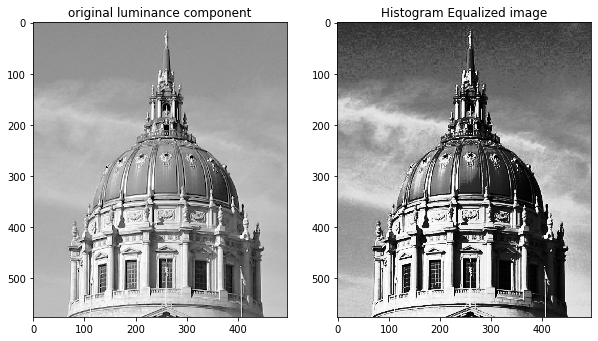

In [0]:
# 1F: Performing Histogram equalization on L(luminance) component and display the enhanced image 

equ = cv2.equalizeHist(l)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title('original luminance component')
ax1.imshow(l, cmap ='gray')

ax2.set_title('Histogram Equalized image')
ax2.imshow(equ, cmap ='gray')



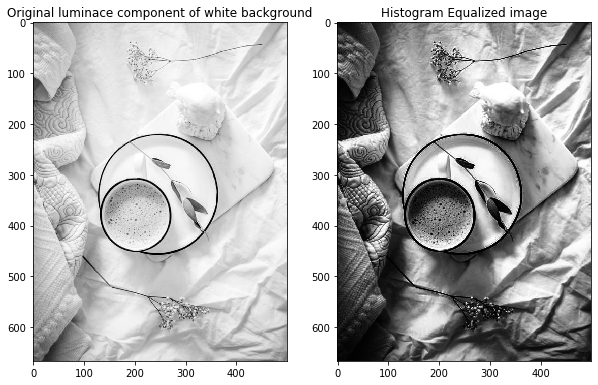

In [0]:
# 1 G: Evaluation of histogram equalization and back-projection.

# a. Histrogram Equalization does not work on white background images as histogram equalization gives more dark picture instead of white one.

import cv2
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

low = cv2.imread("histogram.png")
low_lab = lab_image = cv2.cvtColor(low, cv2.COLOR_BGR2LAB)

l_low, a_low, b_low = cv2.split(low_lab)


e1 = cv2.equalizeHist(l_low)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title('Original luminace component of white background')
ax1.imshow(l_low, cmap ='gray')

ax2.set_title('Histogram Equalized image')
ax2.imshow(e1, cmap ='gray')


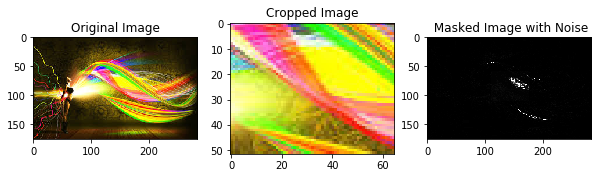

In [0]:
# 1G 2. Back projection does not work on those images in which it is very difficult to segregate colors and color pixel changes very quickly as visible in below images.

rugby_cropped_image = cv2.imread("Back_project_cropped.png")
rugby_cropped_rgb = cv2.cvtColor(rugby_cropped_image,cv2.COLOR_BGR2RGB)
rugby_cropped_lab = cv2.cvtColor(rugby_cropped_image, cv2.COLOR_BGR2LAB)

rugby_image = cv2.imread("Back_project.png")
rugby_rgb = cv2.cvtColor(rugby_image, cv2.COLOR_BGR2RGB)
rugby_lab = cv2.cvtColor(rugby_image, cv2.COLOR_BGR2LAB)


hist2d_rugby = cv2.calcHist([rugby_cropped_lab],[1,2], None, [256,256],[0,256, 0,256])

mask_rugby = cv2.calcBackProject([rugby_lab], [1,2], hist2d_rugby,[0,256, 0,256],1)



# Apply filter to improve the image after backprojection

#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
#filter_image = cv2.filter2D(mask, -1, kernel)

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))
ax1.set_title("Original Image")
ax1.imshow(rugby_rgb)

ax2.set_title("Cropped Image")
ax2.imshow(rugby_cropped_rgb)

ax3.set_title(" Masked Image with Noise")
ax3.imshow(mask_rugby, cmap ='gray')

### Cropped image is part of image which is chosen to test back-projection as it does not reflect it correctly. Therefore, it can be said that this technique fails on pictures
# in which colors are very bright and changing its color

In [0]:
# 2: PCA exercise(Pleas make sure to run in a sequence as cells values depend on its previous cells. If it is giving error , please re-run it from starting of this section)

In [0]:
# 2 A. Load the data and calculate mean image for digit 5
# Data has been taken directly from in-built library, you may see change of data as we are processing data in batches

# Import tensorflow
import tensorflow as tf
# Import tensorflow's MNIST data handle
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

from PIL import Image
from numpy import *
from scipy.ndimage import filters

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# Since data is for 10 digits. hence we shall create an array of digit 5 only.

image_count = 30000
data = mnist.train.next_batch(image_count)

images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

image_5 = []

# Now lets seggregate digit 5 from image data-set and store it in a list

for index, image in enumerate(images):
   
    if np.argmax(labels[index]) ==5:
        image_5.append(image[np.argmax(labels[index]) ==5])
        #print ('Digit in the image', np.argmax(labels[index]))
        #plt.imshow(image.reshape(28,28),cmap='gray')
        #plt.show()

image_5= np.array(image_5)
image_5 = image_5.reshape(-1,784)

#for index, image in enumerate(image_5):
         #plt.imshow(image.reshape(28,28),cmap='gray')
         #print("Digit in the image 5")
         #plt.show()
        
print(image_5.shape)
        
        
# image_5 holds training set data

(2767, 784)


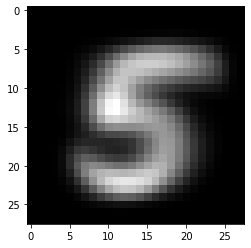

In [0]:
# 2A. part 1:  Lets calculate the mean image from a set of digit 5 images given above:

def computeAverage(imlist):

    averageim = array(imlist[0], 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(imname)
        except:
            print (imname + '...skipped')
    

#averageim = averageim/len(image_5)
    return averageim/len(image_5)


mean_image = computeAverage(image_5)
plt.imshow(mean_image.reshape(28,28), cmap ='gray')

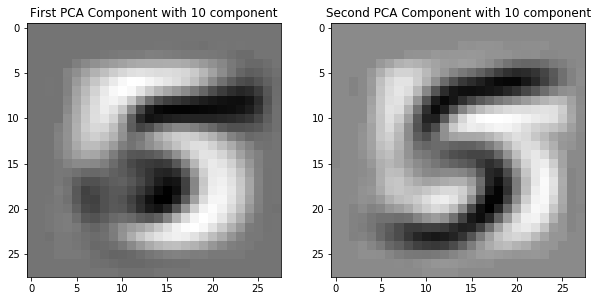

In [0]:
# 2A part 2 : lets do PCA on a set of training images and plot first 2 principal components.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

X_std = StandardScaler().fit_transform(image_5)
#X_norm = normalize(image_5.values)

sklearn_pca_10 = PCA(n_components=10).fit(X_std)
sklearn_pca_50 = PCA(n_components=50).fit(X_std)

p1 = sklearn_pca_10.components_[0]
p2 = sklearn_pca_10.components_[1]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.set_title('First PCA Component with 10 component')
ax1.imshow(p1.reshape(28,28), cmap='gray')

ax2.set_title('Second PCA Component with 10 component')
ax2.imshow(p2.reshape(28,28), cmap='gray')


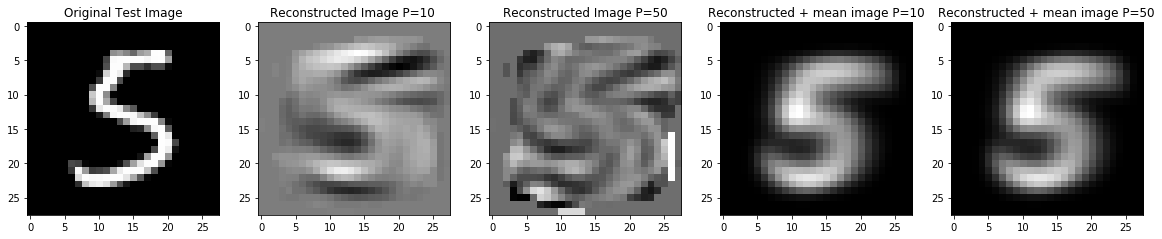

In [0]:
# 2B. Lets reconstruct test image by using mean image and principal components with p=10, p=50
import numpy as np

# formula used here 

# PCA reconstruction=PC scores*Eigenvectors.⊤ranspose + mean_image

# Pick a test image to reconstruct the image

test_image = image_5[170]

n_component_10 =10
Xhat_10 = np.dot(sklearn_pca_10.transform(test_image.reshape(-1,1))[:,:n_component_10], sklearn_pca_10.components_[:n_component_10,:])
Xhat_10_mean = Xhat_10+ mean_image

n_component_50 =50
Xhat_50 = np.dot(sklearn_pca_50.transform(test_image.reshape(-1,1))[:,:n_component_50], sklearn_pca_50.components_[:n_component_50,:])
Xhat_50_mean = Xhat_50 + mean_image

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,10))
ax1.set_title('Original Test Image')
ax1.imshow(test_image.reshape(28,28), cmap='gray')

ax2.set_title('Reconstructed Image P=10 ')
ax2.imshow(Xhat_10[0].reshape(28,28), cmap='gray')

ax3.set_title('Reconstructed Image P=50')
ax3.imshow(Xhat_50[0].reshape(28,28), cmap='gray')

ax4.set_title('Reconstructed + mean image P=10')
ax4.imshow(Xhat_10_mean[0].reshape(28,28), cmap='gray')

ax5.set_title('Reconstructed + mean image P=50')
ax5.imshow(Xhat_50_mean[0].reshape(28,28), cmap='gray')

# I have shown here original test image, reconstructed image from p=10, reconstructed image from p=50, reconstructed image with mean image added from p=10 and
# reconstructed image with mean image added from p=50 in a sequence. It is clearly visible mean_image has to be added for projection with visualization as we lost
# information in PCA=10 & PCA=50.

In [0]:
# 2C. Lets reconstruct a test image in which we have taken numbers from 0-9 and merged it together in order to get a big image of size (224,280). We have generated digit 
# images from left to right and then arranged them all row-wise. 

image_count = 40
data = mnist.train.next_batch(image_count)

images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Now lets seggregate digit 5 from image data-set and store it in a list
image_0 = []
image_1 = []
image_2 = []
image_3 = []
image_4 = []
image_5 = []
image_6 = []
image_7 = []
image_8 = []
image_9 = []

for index, image in enumerate(images):
   
    if np.argmax(labels[index]) ==0:
        image_0.append(image[np.argmax(labels[index]) ==0])
    elif np.argmax(labels[index]) ==1:
        image_1.append(image[np.argmax(labels[index]) ==1])
    elif np.argmax(labels[index]) ==2:
        image_2.append(image[np.argmax(labels[index]) ==2])
    elif np.argmax(labels[index]) ==3:
        image_3.append(image[np.argmax(labels[index]) ==3])
    elif np.argmax(labels[index]) ==4:
        image_4.append(image[np.argmax(labels[index]) ==4])
    elif np.argmax(labels[index]) ==5:
        image_5.append(image[np.argmax(labels[index]) ==5])
    elif np.argmax(labels[index]) ==6:
        image_6.append(image[np.argmax(labels[index]) ==6])
    elif np.argmax(labels[index]) ==7:
        image_7.append(image[np.argmax(labels[index]) ==7])
    elif np.argmax(labels[index]) ==8:
        image_8.append(image[np.argmax(labels[index]) ==8])
    else:
        image_9.append(image[np.argmax(labels[index]) ==9])

image_0= np.array(image_0)
image_1= np.array(image_1)
image_0 = image_0[0].reshape(-1,784)
image_1 = image_1[0].reshape(-1,784)
image_2= np.array(image_2)
image_3= np.array(image_3)
image_2 = image_2[0].reshape(-1,784)
image_3 = image_3[0].reshape(-1,784)
image_4= np.array(image_4)
image_5= np.array(image_5)
image_4 = image_4[0].reshape(-1,784)
image_5 = image_5[0].reshape(-1,784)
image_6= np.array(image_6)
image_7= np.array(image_7)
image_6 = image_6[0].reshape(-1,784)
image_7 = image_7[0].reshape(-1,784)
image_8= np.array(image_8)
image_9= np.array(image_9)
image_8 = image_8[0].reshape(-1,784)
image_9 = image_9[0].reshape(-1,784)
        




merged_image = np.hstack((image_0.reshape(28,28), image_1.reshape(28,28), image_2.reshape(28,28), image_3.reshape(28,28), image_4.reshape(28,28), image_5.reshape(28,28)
                         ,image_6.reshape(28,28), image_7.reshape(28,28), image_8.reshape(28,28), image_9.reshape(28,28)))

occluded_image = merged_image.copy()
#for index, image in enumerate(image_5):
         #plt.imshow(image.reshape(28,28),cmap='gray')
         #print("Digit in the image 5")
         #plt.show()

for i in range(0,3):
      merged_image = np.vstack((merged_image, merged_image))
  
# merged_image : Here it is treated as test image in which we shall be calculating SSD, DIFS and DFSS
# occluded_image: this image is copy of test image on which we will put occlusion in order to testify SSD, DFFS heatmap changes later in this section

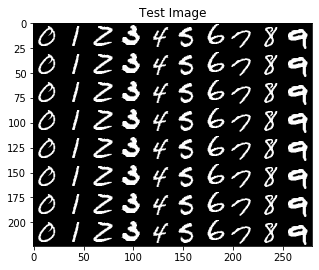

In [0]:
# Lets visualize test image
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Test Image")
ax.imshow(merged_image, cmap='gray')


In [0]:
# 2C. Lets calculate SSD between merged image and mean image of training set.
# mean_image: mean image calculated from training data
# merged_image: our test image on which digits are chosen from 0-9
# These ranges from (0-196) and (0-252) are chosen as last pixel will not covered when moving from left to right. hence we have made sure to cover every (28* 28 pixel)

x=[]
from scipy.spatial import distance
for i in range(0,196,1):
    for j in range(0,252,1):
      dist = (mean_image.reshape(-1,28) - merged_image[i:i+28,j:j+28])**2
      dist = np.sum(dist)
      dist = np.sqrt(dist)
      x.append(dist)    

SSD =np.array(x)
SSD = SSD.reshape(-1,252)
print(SSD.shape)

(196, 252)


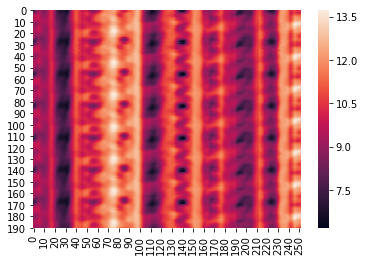

In [0]:
# Lets plot heatmap for SSD as given below

import seaborn as sns
sns.heatmap(SSD)

In [0]:
# 2C. Below functions are used in order to get DIFS using merged image, mean image and eigen vectors from 10 principal components

def calculate_difs_10(Y, x):

  # this function is specific to calculate DIFS based on 10 eigen vectors
    alpha =0
    for k in range(0,10,1):
        alpha1 = (np.sum(np.multiply((Y - x.reshape(-1,28)), sklearn_pca_10.components_[k].reshape(-1,28))))**2
        alpha += alpha1

    return alpha
  
  
def calculate_difs_50(Y, x):

   # this function is specific to calculate DIFS based on 50 eigen vectors
    alpha2 =0
    for k in range(0,50,1):
        alpha3 = (np.sum(np.multiply((Y - x.reshape(-1,28)), sklearn_pca_50.components_[k].reshape(-1,28))))**2
        alpha2 += alpha3

    return alpha2
    
    


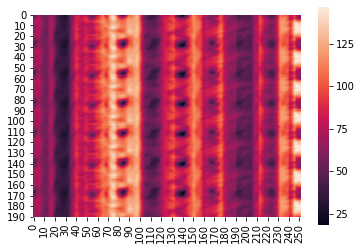

In [0]:
# 2 C. Lets calculate DFFS which is simply difference between SSD and DIFS and plotting it from 10 eigen vectors 
# These ranges from (0-196) and (0-252) are chosen as last pixel will not covered when moving from left to right. hence we have made sure to cover every (28* 28 pixel)

DIFS_10  = []
for s in range(0,196,1):
  for t in range(0,252,1):
    total_loss  = calculate_difs_10(merged_image[s:s+28,t:t+28], mean_image)
    DIFS_10.append(total_loss)

DIFS_10 = np.array(DIFS_10)
DIFS_10 = DIFS_10.reshape(-1,252)
# Since we have taken sqrt of SSD, now we have to square it in order to get(DFFS= SSD - DIFS)
DFFS_10 = (SSD**2) - DIFS_10

# Lets plot the heatmap for DFFS which is calculated from eigen vectors with 10 values
sns.heatmap(DFFS_10, square=True)



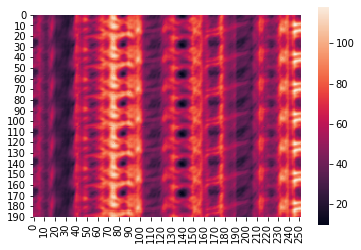

In [0]:
# 2 C. Lets calculate DFFS which is simply difference between SSD and DIFS and plotting it from 50 eigen vectors
# These ranges from (0-196) and (0-252) are chosen as last pixel will not covered when moving from left to right. hence we have made sure to cover every (28* 28 pixel)

DIFS_50  = []
for s in range(0,196,1):
  for t in range(0,252,1):
    loss_50  = calculate_difs_50(merged_image[s:s+28,t:t+28], mean_image)
    DIFS_50.append(loss_50)


DIFS_50 = np.array(DIFS_50)
DIFS_50 = DIFS_50.reshape(-1,252)
DFFS_50 = (SSD**2) - DIFS_50

# Lets plot the heatmap for DFFS which is calculated from eigen vectors with 50 values
sns.heatmap(DFFS_50, square=True)

In [0]:
# 2D. lets generate some occlusion in test image and calculate SSD, DFFS heatmaps again
# occluded_image was generated from test image copy previously.
# if this throws an error on stacking images as we may run it multiple times. Make sure to run [occluded_image = merged_image.copy()] available in previous sections

occluded_image[:,140:168] = occluded_image[:,140:168]+occluded_image[:,140:168].T

for i in range(0,3):
      occluded_image = np.vstack((occluded_image, occluded_image))




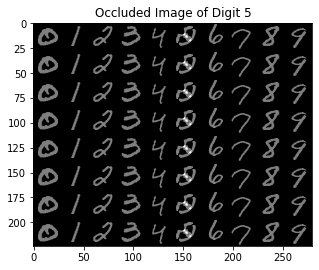

In [0]:
# Lets visualize occluded image and look over digit 5

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Occluded Image of Digit 5")
ax.imshow(occluded_image, cmap ='gray')

(196, 252)


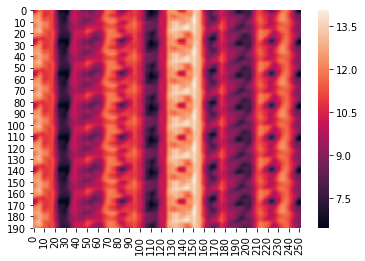

In [0]:
# 2D. Lets calculate SSD between occluded image and mean image of training set.

xc =[]
from scipy.spatial import distance
for i in range(0,196,1):
    for j in range(0,252,1):
      dist_occ = (mean_image.reshape(-1,28) - occluded_image[i:i+28,j:j+28])**2
      dist_occ = np.sum(dist_occ)
      dist_occ = np.sqrt(dist_occ)
      xc.append(dist_occ)    

SSD_OCC =np.array(xc)
SSD_OCC = SSD_OCC.reshape(-1,252)
print(SSD_OCC.shape)


# Lets plot heatmap for SSD as given below

import seaborn as sns
sns.heatmap(SSD_OCC)

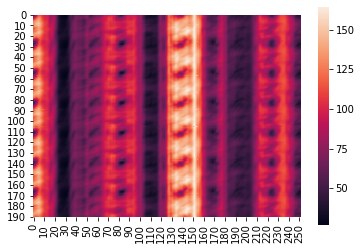

In [0]:
# 2 D. Lets calculate DFFS for Occluded image which is simply difference between SSD and DIFS and plotting it from 10 eigen vectors

DIFSOC_10  = []
for s in range(0,196,1):
  for t in range(0,252,1):
    totalOC_loss  = calculate_difs_10(occluded_image[s:s+28,t:t+28], mean_image)
    DIFSOC_10.append(totalOC_loss)

DIFSOC_10 = np.array(DIFSOC_10)
DIFSOC_10 = DIFSOC_10.reshape(-1,252)
DFFSOC_10 = (SSD_OCC**2) - DIFSOC_10

# Lets plot the heatmap for DFFS which is calculated from eigen vectors with 10 values
sns.heatmap(DFFSOC_10, square=True)

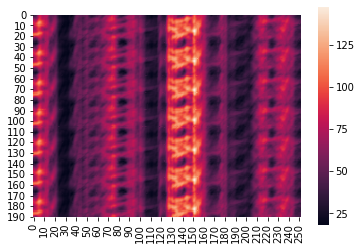

In [0]:
# 2 D. Lets calculate DFFS for Occluded image which is simply difference between SSD and DIFS and plotting it from 50 eigen vectors

DIFSOC_50  = []
for s in range(0,196,1):
  for t in range(0,252,1):
    total5OC_loss  = calculate_difs_50(occluded_image[s:s+28,t:t+28], mean_image)
    DIFSOC_50.append(total5OC_loss)

DIFSOC_50 = np.array(DIFSOC_50)
DIFSOC_50 = DIFSOC_50.reshape(-1,252)
DFFSOC_50 = (SSD_OCC**2) - DIFSOC_50

# Lets plot the heatmap for DFFS which is calculated from eigen vectors with 50 values
sns.heatmap(DFFSOC_50, square=True)